# Examples from Chapter 2

### Remark 2.29

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
from PIL import Image

In [17]:
ls

drive/  sample_data/


In [18]:
filehandle_COT = 'drive/MyDrive/DX/OT/peyre_cuturi_examples/'
sys.path.insert(0, filehandle_COT)

In [19]:
def load_and_convert_image(file_path):
    # Open the image file
    img = Image.open(file_path)
    # Convert the image to grayscale
    img_gray = img.convert('L')
    # Convert the grayscale image to a numpy array
    img_array = np.array(img_gray)
    return img_array

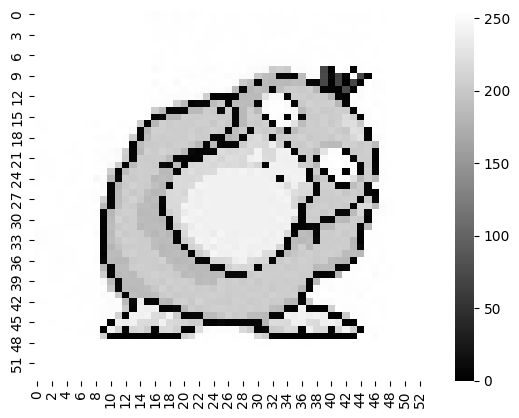

In [20]:
img_path_1 =  os.path.join(filehandle_COT, 'psy.jpg')
img_array_1 = load_and_convert_image(img_path_1)
sns.heatmap(img_array_1, cmap='gray');

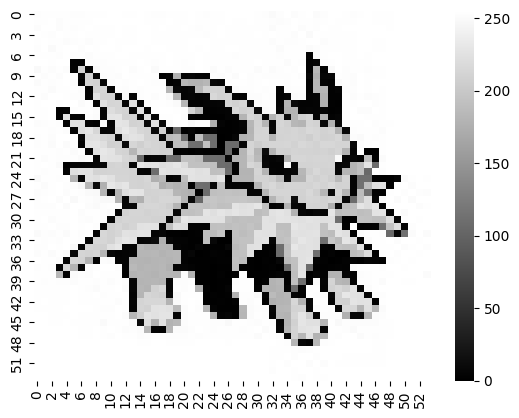

In [21]:
img_path_2 =  os.path.join(filehandle_COT, 'jolt.jpg')
img_array_2 = load_and_convert_image(img_path_2)
sns.heatmap(img_array_2, cmap='gray');

Testing that we can flatten and unflatten to recover image:

length: 2916


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
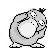

In [22]:
flat_array_1 = img_array_1.flatten()
print(f"length: {len(flat_array_1)}")
unflat_array_1 = flat_array_1.reshape(54,54)
unflat_array_1

length: 2916


array([[253, 254, 254, ..., 255, 255, 255],
       [254, 254, 255, ..., 255, 255, 255],
       [252, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
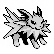

In [23]:
flat_array_2 = img_array_2.flatten()
print(f"length: {len(flat_array_2)}")
unflat_array_2 = flat_array_2.reshape(54,54)
unflat_array_2

optimal transport in 1d is determined by sorting

In [24]:
sorting_indices_1 = np.argsort(flat_array_1)
sorting_indices_2 = np.argsort(flat_array_2)

In [25]:
perm_1 = {index : sorted_index for index, sorted_index in enumerate(sorting_indices_1)}

In [26]:
perm_1[0]

582

In [27]:
perm_1_inv = {value : key for key, value in perm_1.items()}

In [28]:
perm_2 = {index : sorted_index for index, sorted_index in enumerate(sorting_indices_2)}

In [29]:
perm_2_inv = {value : key for key, value in perm_2.items()}

Now, start with sorted intensities of second image, but apply `perm_1_inv` to recover structure of first image.

In [30]:
flat_sorted_2 = flat_array_2[sorting_indices_2]

In [31]:
shuffled_indices = np.array([perm_1_inv[ind] for ind in range(54*54)])

In [32]:
flat_transferred = flat_sorted_2[shuffled_indices]

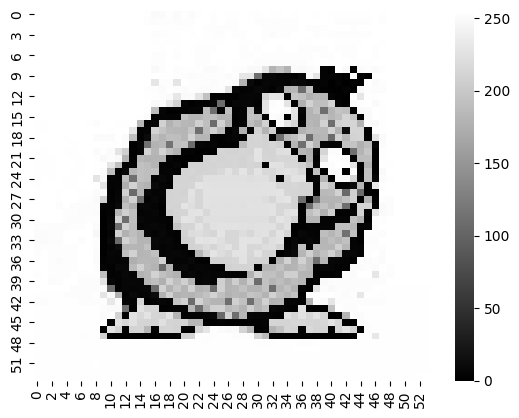

In [33]:
unflat_transferred = flat_transferred.reshape(54,54)
sns.heatmap(unflat_transferred, cmap='gray');